# Q9.1
#### (3.75 hours)

For 𝜆₀ = 293.0°:
	Δ𝑎 = +1.330
	Δ𝑒 = +0.162
	Δ𝜛 = -259.3°
For 𝜆₀ = 293.3°:
	Δ𝑎 = +2.223
	Δ𝑒 = +0.279
	Δ𝜛 = -247.1°


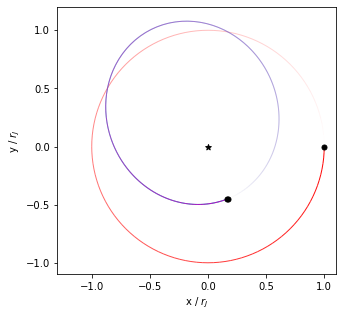

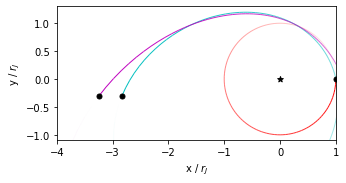

In [1]:
import rebound
import numpy as np

a0, e0, w0d = .8, .4, 295.     # init. orb. elements of test particles
w0r = w0d*np.pi/180            # init. long. of perihelion (rad)
l0sd = np.array([293., 293.3]) # init. mean long. (deg)
l0sr = l0sd*np.pi/180          # convert to radians

sim = rebound.Simulation()
sim.add(m=1., hash='Sun')
sim.add(m=1/999, a=1., hash='Jupiter') # μ₂ = 10⁻³
sim.add(a=a0, e=e0, pomega=w0r, l=l0sr[0], hash='Test1')
sim.add(a=a0, e=e0, pomega=w0r, l=l0sr[1], hash='Test2')
ps = sim.particles
fig0 = rebound.OrbitPlot(sim, unitlabel="/ $r_J$", color=True, xlim=(-1.3,1.1),
                        ylim=(-1.1,1.2))
sim.move_to_com()
sim.integrate(2*np.pi)     # for one Jupiter period
fig1 = rebound.OrbitPlot(sim, unitlabel="/ $r_J$", color=True, xlim=(-4.,1.),
                        ylim=(-1.1,1.3))

for i,l0d in enumerate(l0sd):
    p = i+2 # starting from test particles
    da = ps[p].a - a0
    de = ps[p].e - e0
    dwr = ps[p].pomega - w0r
    dwd = dwr*180/np.pi
    print('For 𝜆₀ = {:.1f}°:'.format(l0d))
    print('\tΔ𝑎 = +{:.3f}\n\tΔ𝑒 = +{:.3f}\n\tΔ𝜛 = {:.1f}°'.format(da, de, dwd))

## Notes
- Unlike Fig. 9.1, each trace is an osculating curve corresponding to instantaneous orbital elements—*not* past trajectories.
- Possible sources of discrepancies with the [authors' answers (p. 5)](http://ssdbook.maths.qmul.ac.uk/answers.pdf) include a different integration scheme (REBOUND's default is [IAS15](https://rebound.readthedocs.io/en/latest/modules.html#integrators)).
- Consistent with the authors' answers:
  - $\Delta a$ and $\Delta e$ are both larger for $\lambda_0 = 293.3^\circ$
  - $|\Delta \varpi|$ is larger for $\lambda_0 = 293^\circ$
  

In [2]:
%%time
l0sd = np.arange(0., 360., .1) # init. mean long. (deg)
l0sr = l0sd*np.pi/180           # convert to radians
das = np.zeros(l0sd.size)      # Δ𝑎 = 𝑎₁ - 𝑎₀

for i in range(das.size):
    sim = rebound.Simulation()
    sim.add(m=1., hash='Sun')
    sim.add(m=1/999, a=1., hash='Jupiter') # μ₂ = 10⁻³
    sim.add(a=a0, e=e0, pomega=w0r, l=l0sr[i], hash='Test')
    ps = sim.particles
    sim.move_to_com()
    sim.integrate(2*np.pi)     # for one Jupiter period
    das[i] =  ps[2].a - a0
    
damax, damin = np.argmax(das), np.argmin(das)
print('Δ𝑎_max = +{:.3f}  for 𝜆₀ = {:.1f}°'.format(das[damax], l0sd[damax]))
print('Δ𝑎_min = {:.4f} for 𝜆₀ = {:.1f}°\n'.format(das[damin], l0sd[damin]))

Δ𝑎_max = +5.080  for 𝜆₀ = 293.8°
Δ𝑎_min = -0.1839 for 𝜆₀ = 337.3°

CPU times: user 5.54 s, sys: 0 ns, total: 5.54 s
Wall time: 5.54 s


## Notes
- Overall, these results are in good agreement with the authors, especially for $\Delta a_\textrm{min}$ and the values of $\lambda_0$
  